In [1]:
#Accuracy: Overall, how often is/ the classifier correct ?
#(TP+TN)/total

#Misclassification rate or Error Rate: Overall, how often is it wrong ?
# (FP+FN)/total

#Recall or TP Rate : When its actually yes, how often does it predict yes ?
# (TP/actual yes)

#Precision : When it predicts yes, how often is it correct ?
#(TP/predicted yes)

#F1 Score : H.M. of precision and recall

# Confusion matrix in scikit-learn

In [2]:
import pandas as pd
df = pd.read_csv('datasets/diabetes.csv')
#df.head()
#df.isna().sum()

In [3]:
X = df.drop('diabetes',axis = 1).values
y = df['diabetes'].values
#X = X.reshape(-1,1)
y = y.reshape(-1,1)
#print(X)
#print(y)
print(X.shape)
print(y.shape)

(768, 8)
(768, 1)


In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 8)

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


C:\Users\MRROBOT\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [5]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[179  27]
 [ 57  45]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       206
           1       0.62      0.44      0.52       102

    accuracy                           0.73       308
   macro avg       0.69      0.66      0.66       308
weighted avg       0.71      0.73      0.71       308



# Logistic regression and the ROC Curve

Building a logistic regression model

In [15]:
import pandas as pd
df = pd.read_csv('datasets/diabetes.csv')
X = df.drop('diabetes',axis = 1)
y = df['diabetes']

# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
# print(X_train)
# print(y_train)
# Create the classifier: logreg
logreg = LogisticRegression(solver='lbfgs', max_iter=400) #added solver='lbfgs' and max_iter=400 from stackoverflow to solve error

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

#Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[168  38]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



# Plotting an ROC curve

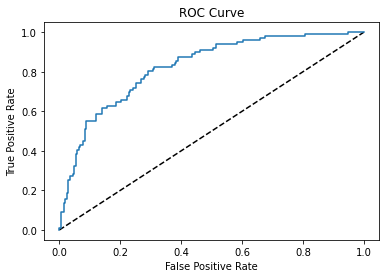

In [16]:
import matplotlib.pyplot as plt
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob =logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Area under the ROC Curve

In [17]:
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
print(X_train.shape)
print(y_train.shape)

logreg = LogisticRegression(solver='lbfgs', max_iter=400)
logreg.fit(X_train,y_train) 
y_pred_prob = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_pred_prob)

(460, 8)
(460,)


0.8242908814011042

# AUC using cross-validation

In [18]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8242908814011042
AUC scores computed using 5-fold cross-validation: [0.81240741 0.80777778 0.82555556 0.87283019 0.84471698]


Hyperparameter tuning

# Hyperparameter tuning with GridSearchCV

In [23]:
#uses votting datasetes
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
knn_cv.best_params_

{'n_neighbors': 14}

In [24]:
#uses diabeted datasets
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver='lbfgs', max_iter=400)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv= 5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.7734742381801205


# Hyperparameter tuning with RandomizedSearchCV

In [25]:
#diabetes dataset
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist,cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 6}
Best score is 0.7370257193786605


# Hold-out set in practice I: Classification

In [30]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear') #added some codes from stackoverflow

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))



Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7608695652173914


# Hold-out set in practice II: Regression

In [31]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


C:\Users\MRROBOT\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.733018591571298, tolerance: 0.00843668478260869
  model = cd_fast.enet_coordinate_descent(
C:\Users\MRROBOT\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.920050137052506, tolerance: 0.008285869565217393
  model = cd_fast.enet_coordinate_descent(
C:\Users\MRROBOT\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.696178648704286, tolerance: 0.00867391304347826
  model = cd_fast.enet_coordinate_descent(
C:\Users\MRROBOT\anaconda3\envs\tensorflow\li

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.24765337510702679
Tuned ElasticNet MSE: 0.16664179543611016


C:\Users\MRROBOT\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.87629751791527, tolerance: 0.010609565217391311
  model = cd_fast.enet_coordinate_descent(
